# Estadistica Aplicada

2do parcial

Bárbara Govea Serna 1902869

Grupo 42

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
banco = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
banco.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


La variable "crédito_pagado" toma el valor de 1 si el cliente ha pagado completamente el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar. 

Además, se dispone de información sobre  el tiempo en meses que lleva pagar completamente el préstamo, registrado en la variable "meses", y el monto del préstamo otorgado en euros, registrado en la variable "cantidad".

# 1. Análisis exploratorio

## a) Cuantas variables y cuantas observaciones tienen la base

In [27]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

In [28]:
variables = banco.shape[1]
observaciones = banco.shape[0]
print(f'El numero de variables es de {variables} y el numero de observaciones es de {observaciones}')

El numero de variables es de 21 y el numero de observaciones es de 1000


## b) Cuál es el monto promedio de los créditos otorgados por el banco

In [29]:
prom_cantidad = banco['cantidad'].mean().round(2)
print(f'El monto promedio de los créditos otorgados por el banco es de {prom_cantidad} euros')

El monto promedio de los créditos otorgados por el banco es de 3271.26 euros


## c) Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad

In [30]:
prom_cantidad_credito_pagado = banco.query('credito_pagado==1')['meses'].mean().round()
print(f'El tiempo promedio que se tardaron en pagar el prestamo los que pagaron el préstamo en su totalidad es de {prom_cantidad_credito_pagado} meses')

El tiempo promedio que se tardaron en pagar el prestamo los que pagaron el préstamo en su totalidad es de 19.0 meses


## d) Cuál es la tasa de interés promedio otorgada por el banco

In [31]:
interes_prom = banco['tasa_de_interes'].mean().round(2)
print(f'La tasa de interes promedio otorgada por el banco es de {interes_prom}')


La tasa de interes promedio otorgada por el banco es de 2.97


## e) Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

In [32]:
prom_monto_credito_pagado = banco.query('credito_pagado==1')['cantidad'].mean().round(2)
prom_interes_credito_pagado = banco.query('credito_pagado==1')['tasa_de_interes'].mean().round(2)
print(f'El monto promedio de prestamo de aquellos que ya pagaron en su totalidad es de {prom_monto_credito_pagado} euros, mientras que la tasa promedio es de {prom_interes_credito_pagado}')



El monto promedio de prestamo de aquellos que ya pagaron en su totalidad es de 2985.46 euros, mientras que la tasa promedio es de 2.92


## f) Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado 

In [33]:
prom_monto_credito_pagado = banco.query('credito_pagado==0')['cantidad'].mean().round(2)
prom_interes_credito_pagado = banco.query('credito_pagado==0')['tasa_de_interes'].mean().round(2)
print(f'El monto promedio de prestamo de aquellos que aun no han pagaron es de {prom_monto_credito_pagado} euros, mientras que la tasa promedio es de {prom_interes_credito_pagado}')

El monto promedio de prestamo de aquellos que aun no han pagaron es de 3938.13 euros, mientras que la tasa promedio es de 3.1


# 2. Estime un modelo de Kaplan-meier

In [34]:
# Estimador Kaplan Meier de la función de supervivencia, primero el tiempo después la censura
from lifelines import KaplanMeierFitter
km1 = KaplanMeierFitter().fit(banco['meses'],banco['credito_pagado'])

## a) cuál es la mediana del tiempo y que significa

In [35]:
# Mediana de la función de supervivencia
km1.median_survival_time_

24.0

La mediana del tiempo de supervivencia de 24, significa que la mitad de los creditos pagados completamente fueron realizados a los 24 meses, es decir, 2 años. 

## b) es mayor/menor que el tiempo promedio del inciso 1c

La mediana es mayor que el tiempo promedio, por lo que hay valores extremedamente pequeños que afectan la media hacia abajo. 

# 3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo

In [36]:
# Estimar el riesgo por exponencial 
from lifelines import ExponentialFitter
exponen = ExponentialFitter().fit(banco['meses'],banco['credito_pagado'])
print('El riesgo es constante durante todo el tiempo')
exponen.hazard_

El riesgo es constante durante todo el tiempo


,Exponential_estimate
4.000000,0.033488
4.136273,0.033488
4.272545,0.033488
4.408818,0.033488
4.545090,0.033488
...,...
71.454910,0.033488
71.591182,0.033488
71.727455,0.033488
71.863727,0.033488


In [37]:
# Estimar el riesgo por medio del modelo weibull
from lifelines import WeibullFitter
mweibull = WeibullFitter().fit(banco['meses'],banco['credito_pagado'])
gamma = mweibull.rho_.round(2)
print(f'Como gamma = {gamma}, el riesgo de que el préstamo se pague en su totalidad es creciente ')

Como gamma = 1.71, el riesgo de que el préstamo se pague en su totalidad es creciente 


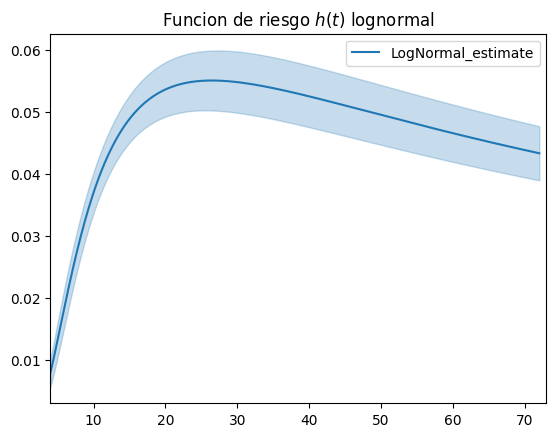

In [38]:
# Estimar el riesgo por medio del modelo Lognormal
from lifelines import LogNormalFitter
llognormal = LogNormalFitter().fit(banco['meses'],banco['credito_pagado'])
llognormal.plot_hazard()
plt.title('Funcion de riesgo $h(t)$ lognormal')
plt.xlim(4,73);

In [39]:
# Para saber que modelo es  "mejor" utilizamos AIC
print('AIC Exponencial:',exponen.AIC_.round(2),'AIC Weibull:',mweibull.AIC_.round(2),'AIC Lognormal:',llognormal.AIC_.round(2))


AIC Exponencial: 6157.19 AIC Weibull: 5900.98 AIC Lognormal: 5813.75


Segun el criterio de AIC, el "mejor" modelo es: el modelo Lognormal, al representar un valor menor y el riesgo de que el préstamo se pague en su totalidad es creciente. Notese que desde el tiempo 4 hasta el tiempo 20 aproximadamente ccrece de una manera acelerada. 

# 4. Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

## a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento


Se elegirán las siguientes variables: 

- numero_creditos
- edad
- meses
- situación
- historia_crediticia

In [40]:
banco['situacion_laboral'].unique()

array(['gobierno', 'obrero', 'administrativo', 'desempleado'],
      dtype=object)

In [41]:
banco['historia_crediticia'].unique()

array(['no_ha_pagado', 'pago_algun_credito', 'pago_retrasado',
       'sin_creditos', 'pago_todos'], dtype=object)

In [42]:
banco = banco[['credito_pagado','meses','tasa_de_interes','cantidad','numero_creditos','edad','historia_crediticia','situacion_laboral']]
banco.head()

,credito_pagado,meses,tasa_de_interes,cantidad,numero_creditos,edad,historia_crediticia,situacion_laboral
0,1,6,4,1169,2,67,no_ha_pagado,gobierno
1,0,48,2,5951,1,22,pago_algun_credito,gobierno
2,1,12,2,2096,1,49,no_ha_pagado,obrero
3,1,42,2,7882,1,45,pago_algun_credito,gobierno
4,0,24,3,4870,2,53,pago_retrasado,gobierno


## b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué

- Tasa de interes y cantidad: Una tasa de interes o una cantidad baja puede aumentar el riesgo de que el prestamo sea pagado en su totalidad. Por otro lado, se cree que a mayor tasa de interés y a mayor cantidad, mayor dificultad se presentara el terminar de pagar el préstamo en su totalidad, por lo que el riesgo disminuirá. 

- Numero de creditos: Una cantidad de créditos menor puede aumentar el riesgo de que el prestamo sea pagado en su totalidad. Por otro lado, si cuenta con más créditos a deber, se dificultará más.

- Edad: Se puede pensar que entre mayor sea la persona, mayor soporte economico tiene, por lo que puede pagar el préstamo más rápido, aumentando el riesgo de que el préstamo sea pagado en su totalidad. Y entre menor sea la persona, el riesgo se disminuirá. 

- Historia creditica: Aquellos que no han tenido ningun crédito, que no han pagado o que lo hicieron con retrado, es decir que no tienen un buen historial crediticio pueden dismuir el riesgo de que el préstamo sea pagado en su totalidad, probablemente no esten acostumbrados a realizar pagos. 

- Situación: Aquellos desempleados, o que tienen un puesto bajo pueden disminuir el riesgo de que el pago sea pagado en su totalidad. Ya que no tienen fondos suficientes para terminar de pagar su crédito.

## c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [43]:
# Contar los valores perdidos/faltantes (missing values) 
banco.isnull().sum()

credito_pagado         0
meses                  0
tasa_de_interes        0
cantidad               0
numero_creditos        0
edad                   0
historia_crediticia    0
situacion_laboral      0
dtype: int64

In [44]:
banco.duplicated().sum()

0

In [45]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   credito_pagado       1000 non-null   int64 
 1   meses                1000 non-null   int64 
 2   tasa_de_interes      1000 non-null   int64 
 3   cantidad             1000 non-null   int64 
 4   numero_creditos      1000 non-null   int64 
 5   edad                 1000 non-null   int64 
 6   historia_crediticia  1000 non-null   object
 7   situacion_laboral    1000 non-null   object
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


In [46]:
# Utilizamos drop_first=True para quedarnos con n-1 dummies
banco = pd.get_dummies(banco,columns=['historia_crediticia','situacion_laboral'], drop_first=True, dtype = int) 
banco.head()

,credito_pagado,meses,tasa_de_interes,cantidad,numero_creditos,edad,historia_crediticia_pago_algun_credito,historia_crediticia_pago_retrasado,historia_crediticia_pago_todos,historia_crediticia_sin_creditos,situacion_laboral_desempleado,situacion_laboral_gobierno,situacion_laboral_obrero
0,1,6,4,1169,2,67,0,0,0,0,0,1,0
1,0,48,2,5951,1,22,1,0,0,0,0,1,0
2,1,12,2,2096,1,49,0,0,0,0,0,0,1
3,1,42,2,7882,1,45,1,0,0,0,0,1,0
4,0,24,3,4870,2,53,0,1,0,0,0,1,0


## d) Estima un modelo de cox con las variables elegidas e interpreta los coeficientes.

In [47]:
from lifelines import CoxPHFitter
cph1 = CoxPHFitter().fit(banco,'meses','credito_pagado')
cph1.print_summary()


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4028.69
         time fit was run = 2023-10-04 04:04:50 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
tasa_de_interes                         -0.45       0.64       0.04            -0.52            -0.37                 0.59                 0.69
cantidad                                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
numero_creditos                          0.03       1.03       0.08            -0.13             0.19                 0.87                 1.21
edad                                     0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
historia_crediticia_pago_algun_credito  -0.38       0.68       0.10            -0.58            -0.18                 0.56                 0.84
historia_crediticia_pago_retrasado      -0.57       0.56       0.15            -0.86            -0.29                 0.42                 0.75
historia_crediticia_pago_todos          -1.00       0.37       0.24            -1.46            -0.53                 0.23                 0.59
historia_crediticia_sin_creditos        -1.06       0.35       0.27            -1.58            -0.53                 0.21                 0.59
situacion_laboral_desempleado           -0.63       0.53       0.29            -1.21            -0.06                 0.30                 0.94
situacion_laboral_gobierno              -0.26       0.77       0.11            -0.48            -0.03                 0.62                 0.97
situacion_laboral_obrero                -0.01       0.99       0.14            -0.28             0.25                 0.76                 1.29

                                         cmp to      z      p   -log2(p)
covariate                                                               
tasa_de_interes                            0.00 -11.90 <0.005     106.03
cantidad                                   0.00 -16.03 <0.005     189.77
numero_creditos                            0.00   0.35   0.72       0.47
edad                                       0.00   3.71 <0.005      12.26
historia_crediticia_pago_algun_credito     0.00  -3.66 <0.005      11.98
historia_crediticia_pago_retrasado         0.00  -3.92 <0.005      13.44
historia_crediticia_pago_todos             0.00  -4.21 <0.005      15.24
historia_crediticia_sin_creditos           0.00  -3.95 <0.005      13.67
situacion_laboral_desempleado              0.00  -2.16   0.03       5.04
situacion_laboral_gobierno                 0.00  -2.22   0.03       5.23
situacion_laboral_obrero                   0.00  -0.10   0.92       0.12
---
Concordance = 0.79
Partial AIC = 8079.38
log-likelihood ratio test = 481.39 on 11 df
-log2(p) of ll-ratio test = 317.33

In [ ]:
cph1.params_ 

covariate
tasa_de_interes                          -0.448345
cantidad                                 -0.000391
numero_creditos                           0.029649
edad                                      0.012856
historia_crediticia_pago_algun_credito   -0.378678
historia_crediticia_pago_retrasado       -0.574573
historia_crediticia_pago_todos           -0.996219
historia_crediticia_sin_creditos         -1.059083
situacion_laboral_desempleado            -0.632440
situacion_laboral_gobierno               -0.255050
situacion_laboral_obrero                 -0.014032
Name: coef, dtype: float64

In [ ]:
cph1.hazard_ratios_

covariate
tasa_de_interes                           0.638684
cantidad                                  0.999609
numero_creditos                           1.030093
edad                                      1.012939
historia_crediticia_pago_algun_credito    0.684766
historia_crediticia_pago_retrasado        0.562945
historia_crediticia_pago_todos            0.369273
historia_crediticia_sin_creditos          0.346774
situacion_laboral_desempleado             0.531294
situacion_laboral_gobierno                0.774878
situacion_laboral_obrero                  0.986066
Name: exp(coef), dtype: float64

### Interpretación de coeficientes: sea alpha = .05

- tasa de interes: p valor < .005 entonces p valor < alpha rechazamos H0, coef estadisticamente sig

La tasa de interes del prestamo disminuye el riesgo de que el préstamo se pague en su totalidad un 36% por cada unidad que aumenta. 

- cantidad: p valor < .005 entonces p valor < alpha rechazamos H0, coef estadisticamente sig

La cantidad del prestamo disminuye el riesgo de que el préstamo se pague en su totalidad un .0391% por cada euro que incrementa. 

- numero de creditos: p valor > alpha mo rechazamos H0, coef no estadisticamente sig

El numero de creditos no afecta en el riesgo de que el préstamo se pague en su totalidad, no aumenta ni disminuye

- edad: p valor < .005 entonces p valor < alpha rechazamos H0, coef estadisticamente sig

La edad aumenta el riesgo de que el préstamo se pague en su totalidad 1.3% por cada año de vida. 

- Ha pagado un crédito en su historial crediticio: p valor < .005 entonces p valor < alpha rechazamos H0, coef estadisticamente sig

El hecho de que la persona haya pagado un solo crédito antes disminuye el riesgo de que el préstamo se pague en su totalidad un 32% en comparación con los que no han pagado ni un crédito. 

- Ha realizado algún pago retrasado en su historial crediticio: p valor < .005 entonces p valor < alpha rechazamos H0, coef estadisticamente sig

El hecho de que la persona haya realizado algún pago retrasado antes disminuye el riesgo de que el préstamo se pague en su totalidad un 44% en comparación con los que no han pagado ni un crédito. 

- Ha pagado todos sus créditos en su historial crediticio: p valor < .005 entonces p valor < alpha rechazamos H0, coef estadisticamente sig

El hecho de que la persona haya pagado todos sus créditos disminuye el riesgo de que el préstamo se pague en su totalidad un 63% en comparación con los que no han pagado ni un crédito. 

- Nunca ha tenido un crédito en su historial crediticio: p valor < .005 entonces p valor < alpha rechazamos H0, coef estadisticamente sig

El hecho de que la persona nunca haya tenido un crédito disminuye el riesgo de que el préstamo se pague en su totalidad un 65% en comparación con los que no han pagado ni un crédito. 

- situacion laboral; desempleado y gobierno: p valor < alpha rechazamos H0, coef estadisticamente sig

El hecho de que la persona este desempleada disminuye el riesgo de que el préstamo se pague en su totalidad un 47% en comparación con el que trabaja en el de administrativo. 

El hecho de que la persona trabaje en el gobierno disminuye el riesgo de que el préstamo se pague en su totalidad un 23% en comparación con el que trabaja en el de administrativo. 

- situación laboral; obrero: p valor > alpha mo rechazamos H0, coef no estadisticamente sig

El hecho de que la persona trabaje de obrero no afecta en el riesgo de que el préstamo se pague en su totalidad, no aumenta ni disminuye en comparación con el que trabaja en el administrativo.

# 5. Con base en los cálculos realizados, redacta un comentario integral de por lo menos 250 palabras que resuma el análisis, reflexiones y recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión

En base a las 1,000 observaciones del Banco de la Ilusión se realizó un análisis con el fin de conocer más a fondo las variables alrededor de los prestamos otorgados por el banco en relación a la cantidad de tiempo que toma al acreedor pagar el préstamo en su totalidad. 
En cuanto al tiempo promedio de aquellos que ya han acreditado el préstamo es de 19 meses, este resultado se encuentra por debajo de la mediana, la cual obtuvimos estimando la función de supervivencia por medio de Kaplan Meier, que resulto de 24 lo que indica que existen valores muy pequeños que afectan la media hacia abajo. 

De igual manera, según el criterio de AIC encontramos que el “mejor” modelo como estimador de la función de riesgo es Lognormal, además en la gráfica notamos que el riesgo de que se pague en su totalidad el crédito es creciente y es acelerado hasta los 20 meses aproximadamente, después notamos un leve descenso indicando que entre más meses pasen, el riesgo de que pague disminuye.

El monto promedio de aquellos que ya pagaron el crédito en su totalidad fue de 2,985.46 euros y la tasa promedio fue de 2.92; ambos resultados se encontraron por debajo de los promedios de aquellos que no han realizado el pago del préstamo, los cuales resultaron de 3,983.13 euros y 3.1, respectivamente. Por lo que, a mayor monto y tasa de interés, el riesgo de que el préstamo se pague en su totalidad disminuye. Este supuesto, fue confirmado por medio de un modelo de Cox donde la tasa de interés resulta mayormente significativa entre estas dos, pues disminuye el riesgo un 36% por cada unidad que aumenta mientras que la cantidad disminuye .0391% por cada euro que incrementa. De igual manera, encontramos por el modelo de Cox que el riesgo de que el préstamo se pague en su totalidad aumenta 1.3% por cada año de vida. 

Por lo que se recomienda a la empresa para aumentar el riesgo prestar atención a estas variables al ceder un préstamo, además prestar atención a su historial crediticio puesto que estas variables afectan significativamente disminuyendo el riesgo de que el préstamo se pague en su totalidad en comparación con los que no han pagado ni un solo crédito. 
Además, poner atención a las personas desempleadas ya que disminuye el riesgo considerablemente en comparación con aquellos que trabajan en administrativo. 